<center><font size=8>Hands-on - K-Means Clustering</font></center>

#Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution

# **Problem Statement**

### Business Context

Customer segmentation plays an important role in the retail industry by dividing a diverse customer base into smaller, more homogenous groups based on common attributes such as demographics, purchasing behavior, preferences, and more. Based on the information gained from this, retailers can identify customer behavioral patterns and tailor their offerings and marketing efforts to cater to the needs of each segment. This helps retailers improve targeted marketing and optimize inventory management, and consequently increasing sales and customer satisfaction.

### Objective

In the advent of an expanding customer base, a prominent retail outlet wants to enhance its marketing and service strategies. With rising competition, they understand the importance of getting a better understanding of their customer base to identify customer behavior and needs. This will allow them to move away from broad marketing campaigns and general service approaches to targeted marketing campaigns and customized offerings

To address this, the retailer seeks to implement a more sophisticated ML-based customer segmentation strategy and improve overall customer experience. As a data scientist hired to execute the same, you have been provided historical data on customer demographics and spending patterns. The task is to analyze the data, use ML to segment the customers into distinct groups, and identify the characteristics of each group to help increase marketing efficiency and effectiveness, identify and develop retention strategies for high-value customers, and help the management make informed business strategies on store layouts and pricing.

### Data Dictionary

1. **Income**: The annual household income of the customer (in dollars)
2. **Age**: The age of the customer (in years)
3. **Recency**: The total number of days since the customer's last purchase
4. **Amount_Wines**: The amount of money spent by the customer on wines in the previous two years (in dollars)
5. **Amount_Fruits**: The amount of money spent by the customer on fruits in the last two years (in dollars)
6. **Amount_SweetProducts**: The amount of money spent by the customer on sweet products in the last two years (in dollars)
7. **Amount_Meat_Fish**: The amount of money spent by the customer on meat and fish in the last two years (in dollars)
8. **Web_Purchases**: The total number of purchases the customer made through the company’s website.
9. **Store_Purchases**: The total number of purchases the customer made directly in stores.

# **Installing and Importing the necessary libraries**

In [ ]:
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 plotly==5.24.1 scikit-learn==1.6.1 -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the data**

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading data into a pandas dataframe
company_customers_details = pd.read_csv("retail_customer_segmentation.csv")

In [ ]:
# creating a copy of the data
data = company_customers_details.copy()

# **Data Overview**

### Viewing the first and last 5 rows of the dataset

In [ ]:
data.head(5)

,Income,Age,Recency,Amount_Wines,Amount_Fruits,Amount_SweetProducts,Amount_Meat_Fish,Web_Purchases,Store_Purchases
0,58138.0,53,58,635,88,88,718,8,4
1,46344.0,56,38,11,1,1,8,1,2
2,71613.0,45,26,426,49,21,238,8,10
3,26646.0,26,26,11,4,3,30,2,4
4,58293.0,29,94,173,43,27,164,5,6


In [ ]:
data.tail(5)

,Income,Age,Recency,Amount_Wines,Amount_Fruits,Amount_SweetProducts,Amount_Meat_Fish,Web_Purchases,Store_Purchases
1595,26816.0,24,50,5,1,4,9,0,3
1596,61223.0,43,46,709,43,118,224,9,4
1597,56981.0,29,91,908,48,12,249,2,13
1598,69245.0,54,8,428,30,30,294,6,10
1599,52869.0,56,40,84,3,1,63,3,4


### Checking the shape of the dataset.

In [ ]:
data.shape

(1600, 9)

- The dataset has 1600 rows and 9 columns.

### Checking the attribute types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1600 non-null   float64
 1   Age                   1600 non-null   int64  
 2   Recency               1600 non-null   int64  
 3   Amount_Wines          1600 non-null   int64  
 4   Amount_Fruits         1600 non-null   int64  
 5   Amount_SweetProducts  1600 non-null   int64  
 6   Amount_Meat_Fish      1600 non-null   int64  
 7   Web_Purchases         1600 non-null   int64  
 8   Store_Purchases       1600 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 112.6 KB


- There are 9 numerical and 0 categorical variables in the data.

### Checking the statistical summary

In [ ]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Income,1600.0,49040.192187,17982.928797,2447.0,35371.5,50008.0,64033.00,79946.0
Age,1600.0,41.596875,11.086362,21.0,33.0,40.0,51.00,70.0
Recency,1600.0,52.701875,27.056710,6.0,29.0,52.0,76.00,99.0
Amount_Wines,1600.0,278.280625,311.838641,0.0,24.0,161.0,452.25,1462.0
Amount_Fruits,1600.0,23.013125,35.793889,0.0,2.0,7.0,28.00,199.0
Amount_SweetProducts,1600.0,23.376875,37.253453,0.0,1.0,7.0,27.00,263.0
Amount_Meat_Fish,1600.0,166.484375,215.702360,6.0,22.0,71.0,227.25,1726.0
Web_Purchases,1600.0,4.159375,2.733568,0.0,2.0,4.0,6.00,27.0
Store_Purchases,1600.0,5.706875,3.139405,0.0,3.0,5.0,8.00,13.0


- On average, customers have an annual household income of ~$50k
- The age of the customers ranges from 21 to 70 years.

### Checking for missing values

In [ ]:
# checking for null values
data.isnull().sum()

,0
Income,0
Age,0
Recency,0
Amount_Wines,0
Amount_Fruits,0
Amount_SweetProducts,0
Amount_Meat_Fish,0
Web_Purchases,0
Store_Purchases,0


- There are no missing values in the data.

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data.

# **Exploratory Data Analysis**

### Univariate Analysis

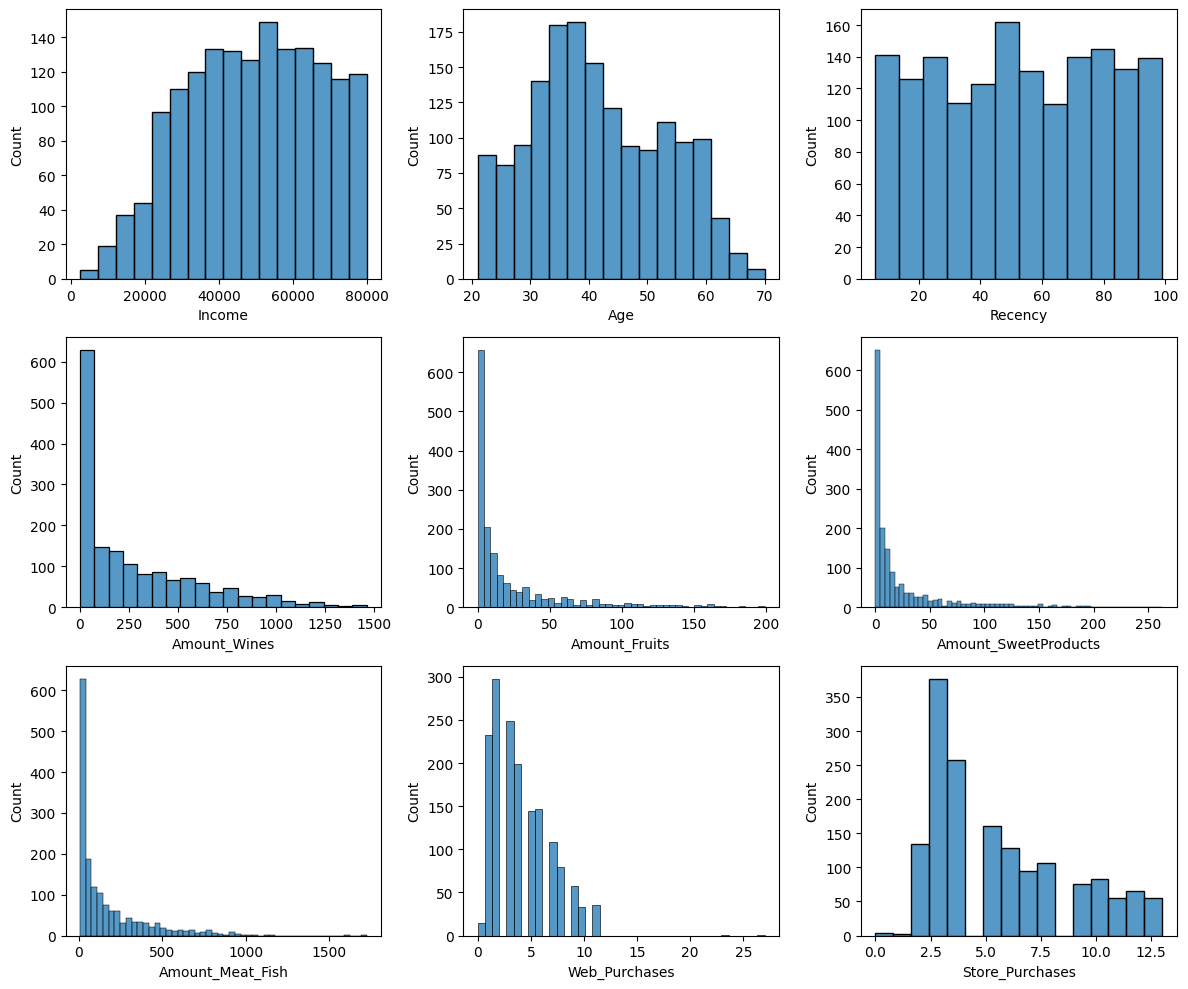

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

# plotting the histogram for each numerical feature
for i, feature in enumerate(data.columns):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

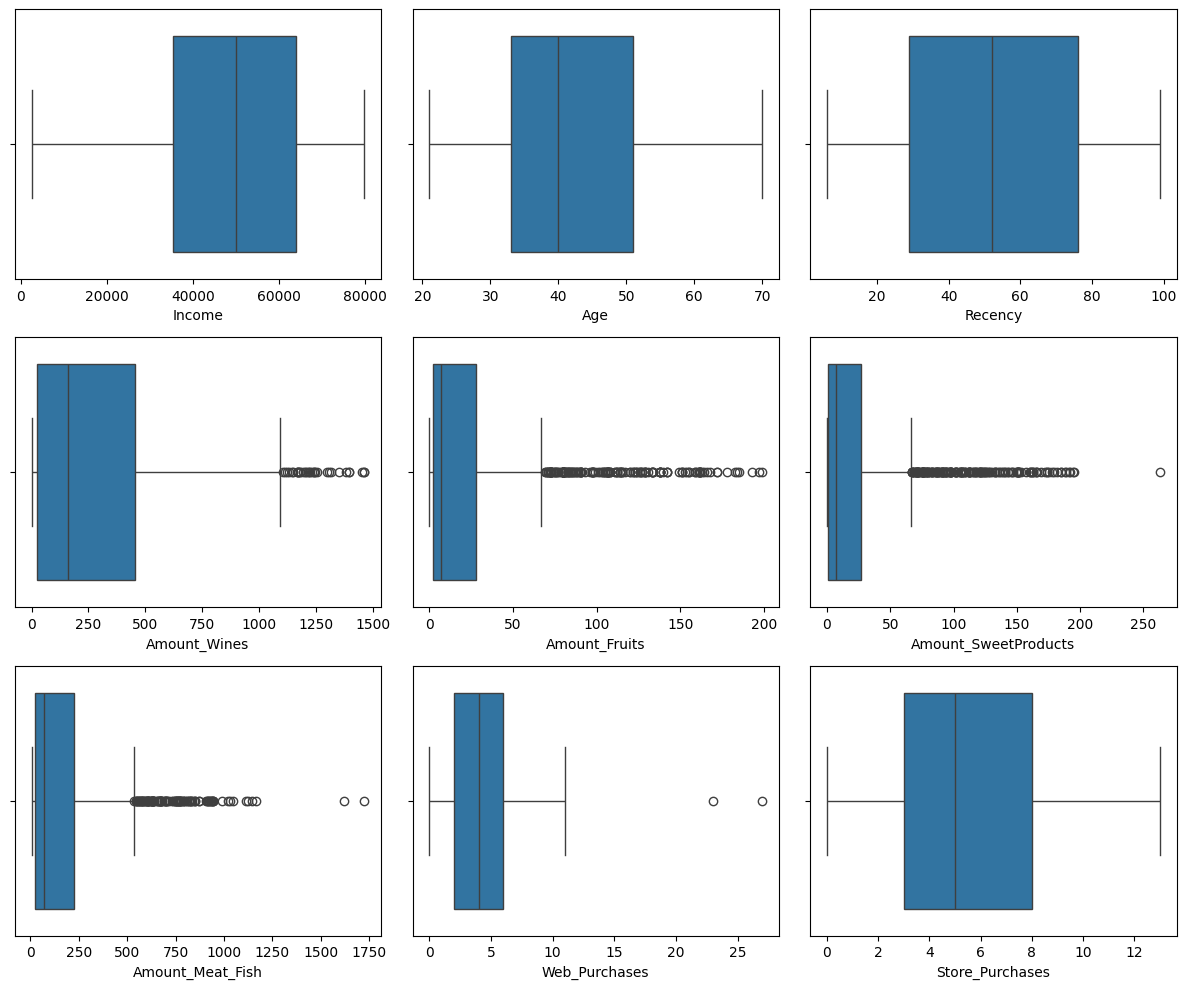

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(data.columns):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the boxplot

plt.tight_layout();   # to add spacing between plots

- The amounts spent by customers have some outlier values, i.e., some customers spend way more than the average amount spent by the entire set of customers.

### Bivariate Analysis

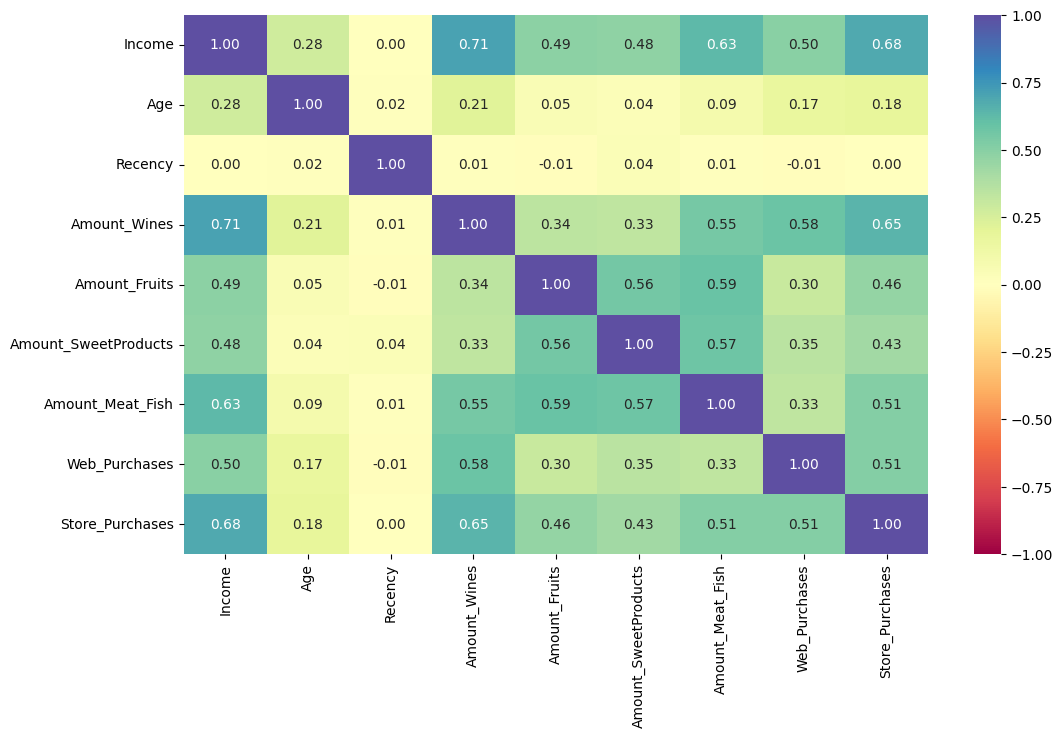

In [ ]:
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
sns.heatmap(
    data.corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

- The amount spent on wine has a high positive correlation with the income of the customer.
- The correlation between income and web purhcases is lower than the correlation between income and store purhcases, indicating that customers with higher incomes tend to make more purchases from the store than online.

In [ ]:
# plotting a pairplot
sns.pairplot(data);

Output hidden; open in https://colab.research.google.com to view.

# **Data Preprocessing**

## Data Scaling

- We'll be scaling the data using the `StandardScaler` of sklearn.
- This implements z-score scaling, i.e., for all values of an attribute,  subtract the mean from the values and divide the resultant by the standard deviation.

In [ ]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns, transform them (i.e., execute the scaling), and create a new dataframe with scaled data
scaled_data = pd.DataFrame(scaler.fit_transform(data))

# Display the scaled data
scaled_data.head()

,0,1,2,3,4,5,6,7,8
0,0.506072,1.028894,0.195877,1.144281,1.816153,1.735231,2.557636,1.405425,-0.543864
1,-0.149978,1.299581,-0.543542,-0.857380,-0.615189,-0.600854,-0.734966,-1.156131,-1.181126
2,1.255628,0.307061,-0.987194,0.473853,0.726241,-0.063823,0.331651,1.405425,1.367924
3,-1.245692,-1.407292,-0.987194,-0.857380,-0.531350,-0.547151,-0.632942,-0.790194,-0.543864
4,0.514694,-1.136605,1.526832,-0.337718,0.558562,0.097286,-0.011521,0.307615,0.093399


In [ ]:
scaled_data.describe()

,0,1,2,3,4,5,6,7,8
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,1.598721e-16,2.597922e-16,-3.996803e-17,4.440892e-17,2.220446e-17,4.773959e-17,-2.220446e-18,4.662937e-17,-4.440892e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.591778e+00,-1.858438e+00,-1.726613e+00,-8.926656e-01,-6.431355e-01,-6.277051e-01,-7.442410e-01,-1.522068e+00,-1.818389e+00
25%,-7.603303e-01,-7.756884e-01,-8.762812e-01,-8.156787e-01,-5.872426e-01,-6.008536e-01,-6.700416e-01,-7.901944e-01,-8.624951e-01
50%,5.383497e-02,-1.440846e-01,-2.594900e-02,-3.762115e-01,-4.475102e-01,-4.397443e-01,-4.428057e-01,-5.832115e-02,-2.252325e-01
75%,8.339851e-01,8.484356e-01,8.613541e-01,5.580571e-01,1.393655e-01,9.728649e-02,2.817986e-01,6.735521e-01,7.306614e-01
max,1.719157e+00,2.562789e+00,1.711686e+00,3.797122e+00,4.918211e+00,6.434250e+00,7.232203e+00,8.358221e+00,2.323818e+00


- As expected, all the attributes have a mean of ~0 and a standard deviation of ~1 after scaling.

# **Dimensionality Reduction and Visualization using t-SNE**

## Reduction to 2 dimensions

In [ ]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(scaled_data)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions

In [ ]:
tsne_2d_data.head()

,Feature 1,Feature 2
0,49.779507,-4.341959
1,-13.018125,-3.316316
2,28.172621,-10.222345
3,-45.435825,-22.603098
4,9.555074,17.562840


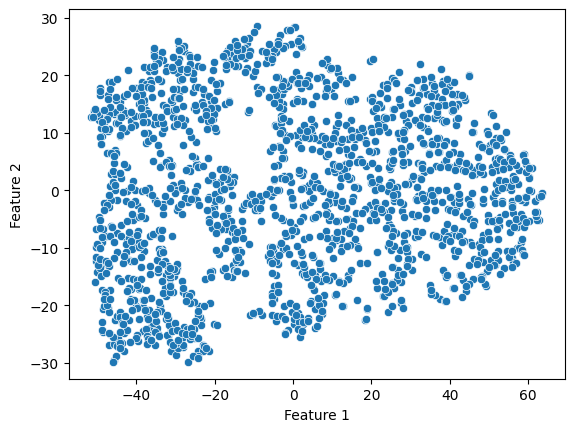

In [ ]:
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");

- We can roughly see 3 or 4 clusters in the data.

- Let's try out different values of perplexity.

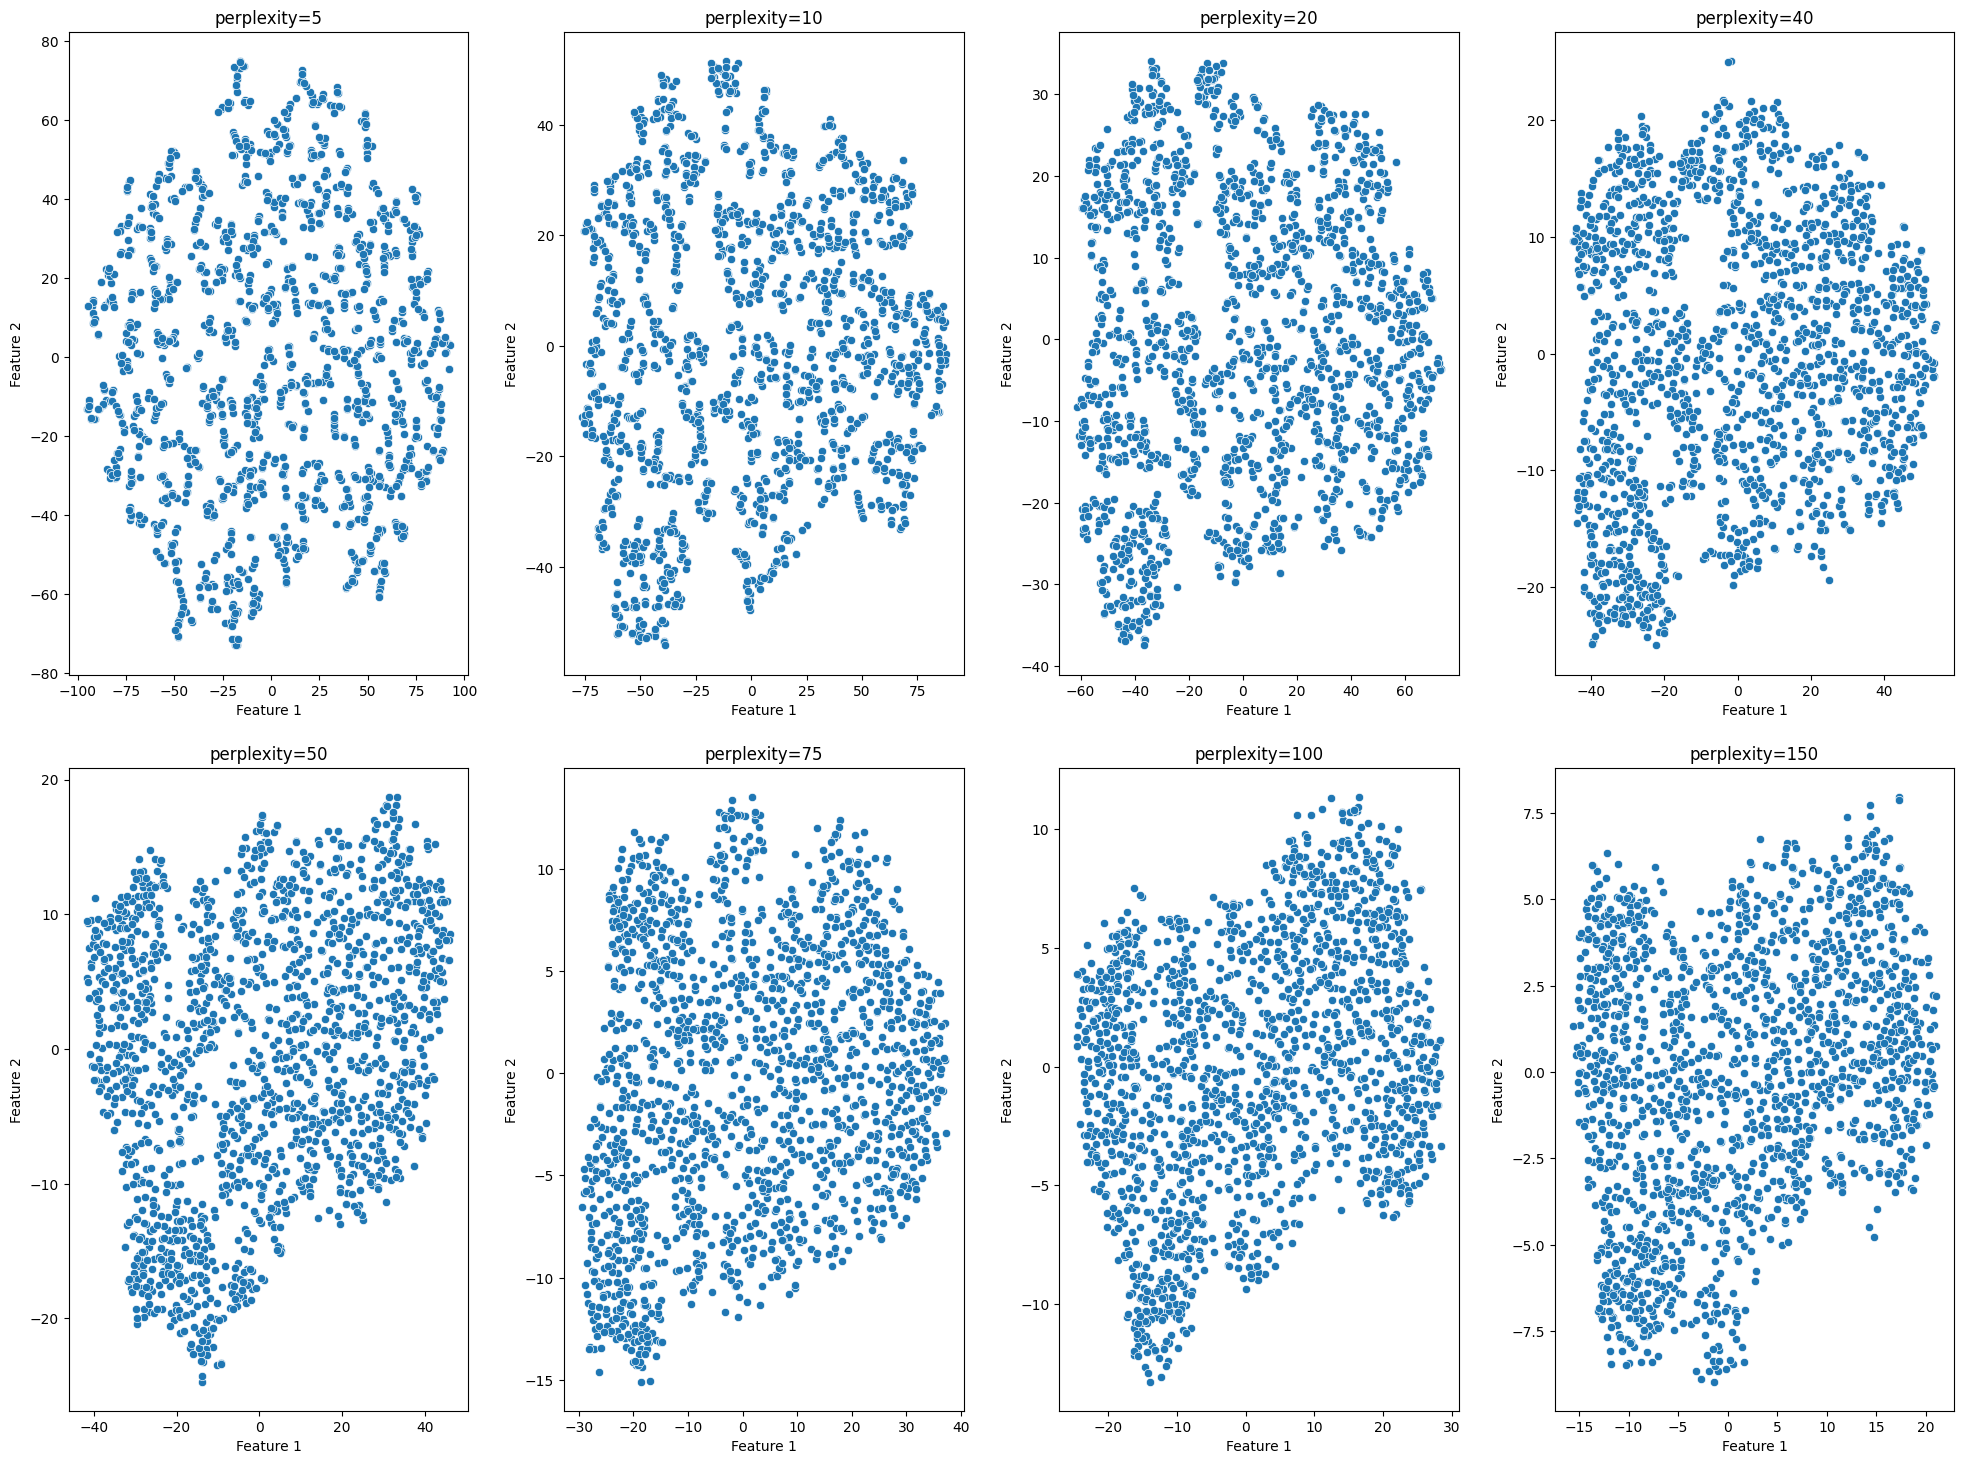

In [ ]:
# Define the list of perplexity values to iterate over
perplexities = [5, 10, 20, 40, 50, 75, 100, 150]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=RS)    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    X_red = tsne.fit_transform(scaled_data)    # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    red_data_df = pd.DataFrame(data=X_red, columns=["Feature 1", "Feature 2"])    # creating a new dataframe with reduced dimensions

    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

- The data seems to exhibit a good visual separation for perplexity=50, and we can roughly see 4 or 5 clusters in it.
- We'll go ahead with this perplexity value.

In [ ]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(scaled_data)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_data.head()

## Reduction to 3 dimensions

- We'll go ahead with perplexity=50.

In [ ]:
# Initiating the TSNE object and setting output dimension to 3
# n_components=3 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one core for parallel computation, which speeds up the process
tsne = TSNE(n_components=3, perplexity=50, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(scaled_data)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have three columns corresponding to the three reduced dimensions

In [ ]:
tsne_3d_data.head()

,Feature 1,Feature 2,Feature 3
0,12.285045,-0.650983,1.319623
1,-1.729638,-5.527844,1.288417
2,6.828343,-0.581539,-2.995000
3,-10.348543,-2.282876,-3.741693
4,1.165053,1.540315,5.172536


In [ ]:
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

- The data seems to exhibit a good visual separation for perplexity=50 in three dimensions too, and we can roughly see 4 or 5 clusters in it.

- One can try out a similar exercise of checking different values of perplexity for the 3-dimensional data found from t-SNE.

# **K-Means Clustering**

### Model Building with K=4

In [ ]:
# create a K-means object
n_clusters = 4
Kmeans_4 = KMeans(n_clusters=n_clusters, random_state=RS)

# fitting the model to the data
Kmeans_4.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Calculate the WCSS (Within-Cluster Sum of Squares)
wcss_k4 = Kmeans_4.inertia_

# Print the WCSS
print("WCSS for K={} is {}".format(n_clusters, wcss_k4))

WCSS for K=4 is 7321.639055442224


In [ ]:
# Calculate the silhouette score
sil_score_k4 = silhouette_score(scaled_data, Kmeans_4.labels_)

# Print the silhouette score
print("Silhouette score for K={} is {}".format(n_clusters, sil_score_k4))

Silhouette score for K=4 is 0.1776121193279328


In [ ]:
# Assigning cluster labels to the tsne_2d_data DataFrame
tsne_2d_data['Clusters'] = Kmeans_4.labels_
tsne_2d_data.head()

,Feature 1,Feature 2,Clusters
0,49.779507,-4.341959,2
1,-13.018125,-3.316316,0
2,28.172621,-10.222345,1
3,-45.435825,-22.603098,3
4,9.555074,17.562840,1


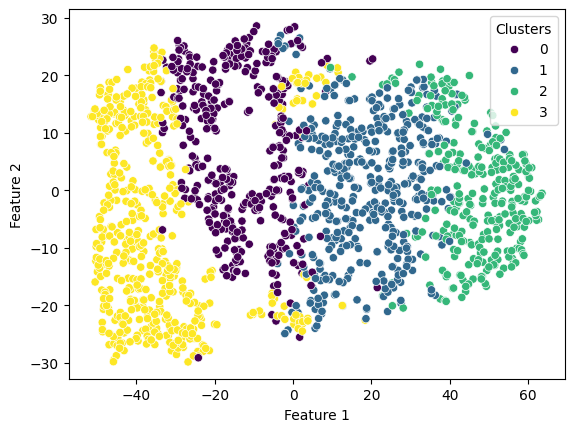

In [ ]:
sns.scatterplot(tsne_2d_data, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [ ]:
# Assigning cluster labels to the tsne_3d_data DataFrame
tsne_3d_data['Clusters'] = Kmeans_4.labels_
tsne_3d_data.head()

,Feature 1,Feature 2,Feature 3,Clusters
0,12.285045,-0.650983,1.319623,2
1,-1.729638,-5.527844,1.288417,0
2,6.828343,-0.581539,-2.995000,1
3,-10.348543,-2.282876,-3.741693,3
4,1.165053,1.540315,5.172536,1


In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

### Finding Optimal K

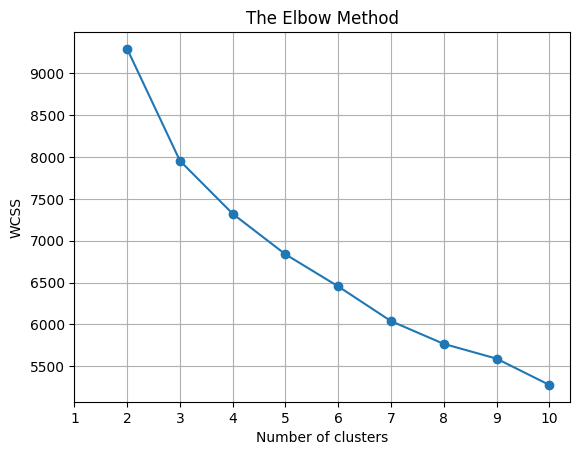

In [ ]:
# calculate WCSS for a range of K values
wcss_list = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_data)

    # Append the inertia (WCSS) to the wcss_list
    wcss_list.append(clusterer.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(2, 11), wcss_list, marker='o')
plt.title('The Elbow Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('WCSS')  # Label the y-axis
plt.xticks(range(1, 11))  # Set the x-ticks from 1 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

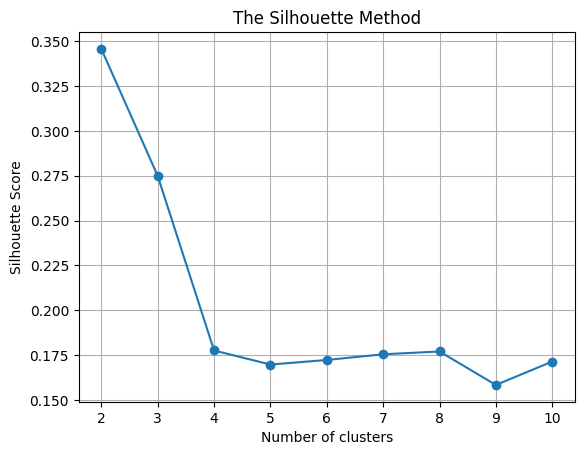

In [ ]:
# calculate Silhouette Scores for a range of K values
sil_score = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_data)

    # Calculate Silhouette Score
    score = silhouette_score(scaled_data, clusterer.labels_)

    # Append the Silhouette Score to the sil_score list
    sil_score.append(score)

# Plot the Silhouette Scores against the number of clusters
plt.plot(range(2, 11), sil_score, marker='o')
plt.title('The Silhouette Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('Silhouette Score')  # Label the y-axis
plt.xticks(range(2, 11))  # Set the x-ticks from 2 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

- Based on the analysis of both the WCSS and Silhouette score plots, we can see that K=3 seems to be a better value than K=4, i.e., we should try building 3 clusters.

### Model Building with Optimal K value

In [ ]:
# create a K-means object
n_clusters = 3
Kmeans_3 = KMeans(n_clusters=n_clusters, random_state=RS)

# fitting the model to the data
Kmeans_3.fit(scaled_data)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Assigning cluster labels to the tsne_2d_data DataFrame
tsne_2d_data['Clusters'] = Kmeans_3.labels_
tsne_2d_data.head()

,Feature 1,Feature 2,Clusters
0,49.779507,-4.341959,2
1,-13.018125,-3.316316,0
2,28.172621,-10.222345,1
3,-45.435825,-22.603098,0
4,9.555074,17.562840,1


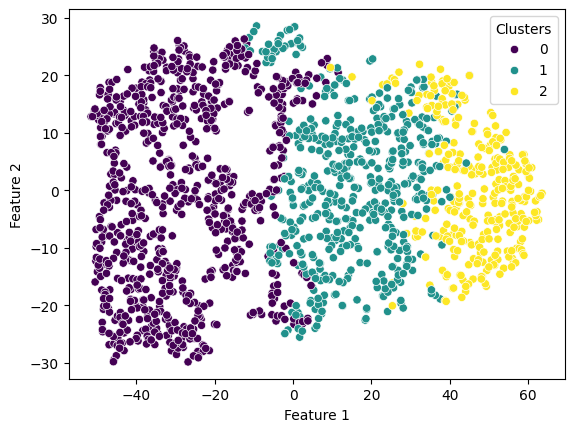

In [ ]:
sns.scatterplot(tsne_2d_data, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [ ]:
# Assigning cluster labels to the tsne_3d_data DataFrame
tsne_3d_data['Clusters'] = Kmeans_3.labels_
tsne_3d_data.head()

,Feature 1,Feature 2,Feature 3,Clusters
0,12.285045,-0.650983,1.319623,2
1,-1.729638,-5.527844,1.288417,0
2,6.828343,-0.581539,-2.995000,1
3,-10.348543,-2.282876,-3.741693,0
4,1.165053,1.540315,5.172536,1


In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

- While K=3 seems to be the optimal number from the Elbow method and considering silhouette scores, the larger blue cluster seems to be separable into two.
    - We might be able to better distinguish between clusters this way.

- As such, we'll proceed forward with 4 clusters, even though it has a lower silhouette score.
    - One can also choose 3 clusters and do cluster profiling to check the cluster characteristics.

# **Cluster Profiling**

In [ ]:
# Add the cluster labels back to the DataFrame
data['Clusters'] = Kmeans_4.labels_

# Display the DataFrame with original values
data.head()

,Income,Age,Recency,Amount_Wines,Amount_Fruits,Amount_SweetProducts,Amount_Meat_Fish,Web_Purchases,Store_Purchases,Clusters
0,58138.0,53,58,635,88,88,718,8,4,2
1,46344.0,56,38,11,1,1,8,1,2,0
2,71613.0,45,26,426,49,21,238,8,10,1
3,26646.0,26,26,11,4,3,30,2,4,3
4,58293.0,29,94,173,43,27,164,5,6,1


Clusters
3    31.5000
1    27.2500
0    23.0625
2    18.1875
Name: proportion, dtype: float64 



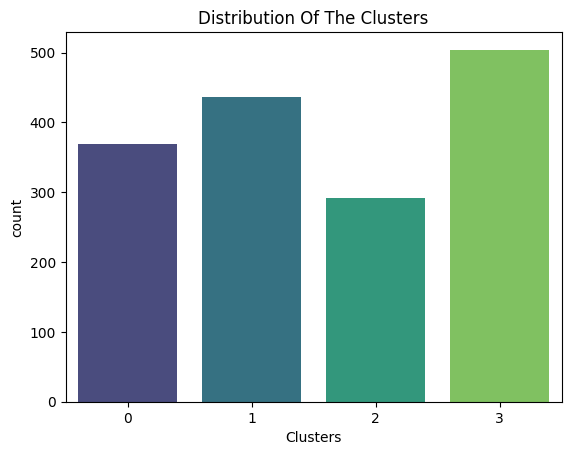

In [ ]:
# checking the distribution of the categories in Clusters
print(100*data['Clusters'].value_counts(normalize=True), '\n')

# plotting the count plot for clusters
sns.countplot(data=data, x='Clusters', palette='viridis').set_title("Distribution Of The Clusters");

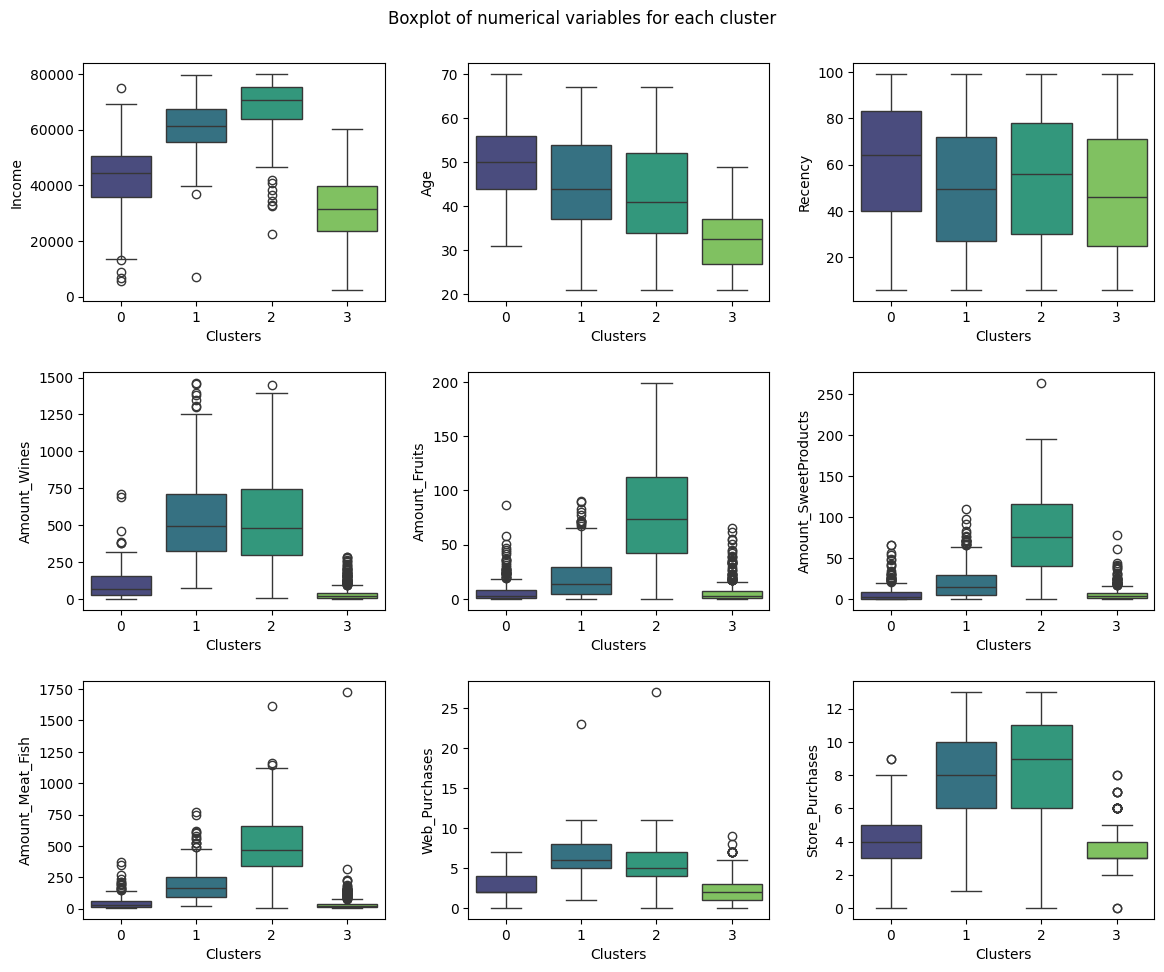

In [ ]:
# Prepare for plotting boxplots of numerical variables for each cluster
plt.figure(figsize=(12, 10))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(3, 3, i + 1)  # Create subplots in a 3x4 grid, starting from index 1
    sns.boxplot(data=data, x="Clusters", y=variable, palette='viridis')  # Create a boxplot for current variable and cluster

# Adjust layout of subplots to improve spacing
plt.tight_layout(pad=2.0)

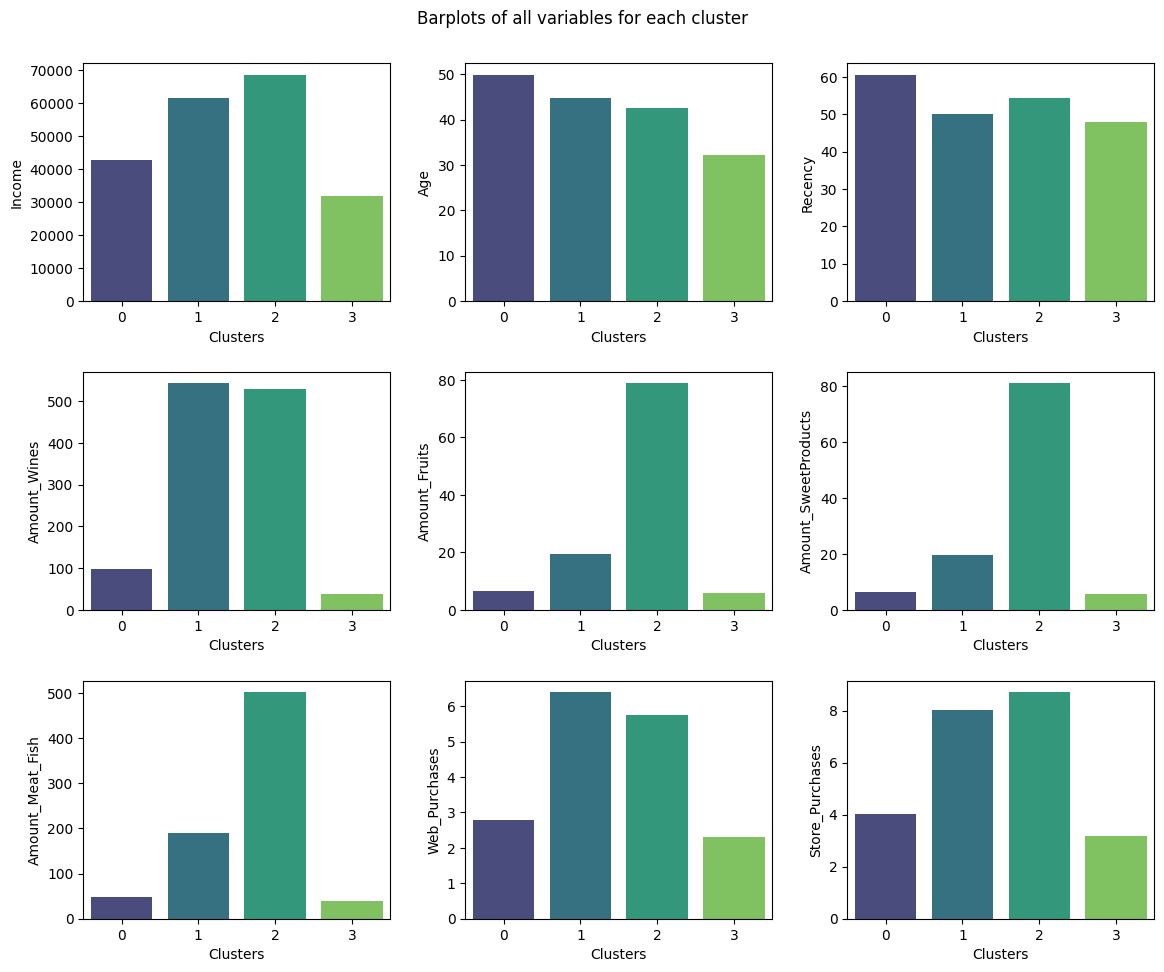

In [ ]:
# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(12, 10))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.barplot(data=data, x="Clusters", y=variable, palette='viridis', errorbar=None)

plt.tight_layout(pad=2.0)

**Cluster 0:**
- The customers in this cluster have the highest average income of ~$70k.
- These customers also spend the most.
- The customers have a slightly higher preference for in-store purchases than online purchases.

**Cluster 1:**
- The customers in this cluster have a low income, with the average being ~$40k.
- These customers spend the least.
- These customers also are infrequent in their purchases, with the last purchase being 2.5 months ago on average.

**Cluster 2:**
- The customers in this cluster also have a low income, with the average being ~$35k.
- These customers spend the least along with Cluster 1 customers.
- Contrary to Cluster 1, these customers are the most frequent purchases.

**Cluster 3:**
- The customers in this cluster have a slightly lower annual household income, with the average being ~$60k.
- These customers also spend a lot, but they typically spend the most on wines compared to all other customers.
- The customers here too have a slightly higher preference for in-store purchases than online purchases.

<font size=6 color='blue'>Power Ahead</font>
___